In [ ]:
import tensorflow

In [ ]:
!pip install cuda

In [ ]:
!conda create -n newCondaEnvironment -c cctbx202208 -y
!source /opt/conda/bin/activate newCondaEnvironment && conda install -c cctbx202208 python=3.7 -y


In [ ]:
!/opt/conda/envs/newCondaEnvironment/bin/python3 --version
!echo 'print("Hello, World!")' > test.py
!/opt/conda/envs/newCondaEnvironment/bin/python3 test.py


In [ ]:
!conda update -n base -c conda-forge conda

In [ ]:
!sudo rm /opt/conda/bin/python3
!sudo ln -sf /opt/conda/envs/newCondaEnvironment/bin/python3 /opt/conda/bin/python3

In [ ]:
!sudo rm /opt/conda/bin/python3.10
!sudo ln -sf /opt/conda/envs/newCondaEnvironment/bin/python3 /opt/conda/bin/python3.10

In [ ]:
!sudo rm /opt/conda/bin/python
!sudo ln -sf /opt/conda/envs/newCondaEnvironment/bin/python3 /opt/conda/bin/python

In [ ]:
!source /opt/conda/bin/activate newCondaEnvironment

In [ ]:
!pip install tensorflow==2.4.1


In [ ]:
tensorflow.__version__

In [ ]:
!pip install protobuf==3.18

In [ ]:
!pip install matplotlib

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU

kernel_initializer =  'he_uniform' 


def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    s = inputs

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)
    
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)
     
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)
     
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)
     
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)
    
    #Expansive path 
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)
     
    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)
     
    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)
     
    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)
     
    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    model.summary()
    
    return model

model = simple_unet_model(128, 128, 128, 3, 4)
print(model.input_shape)
print(model.output_shape)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 128, 128, 12  1312        ['input_1[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 12  0           ['conv3d[0][0]']                 
                                8, 16)                                                        

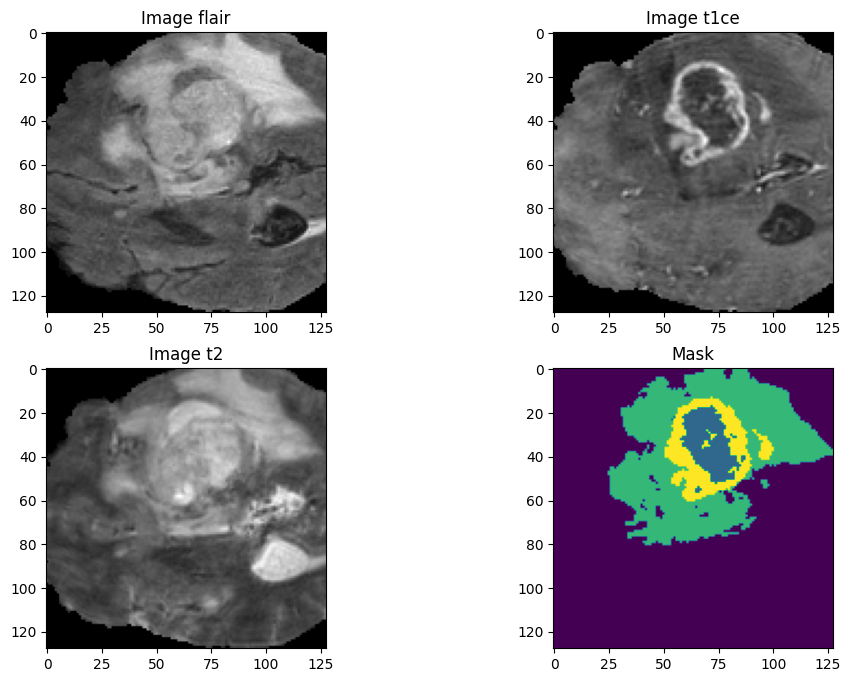

In [2]:
import os
import numpy as np


def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)




def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) 
            batch_start += batch_size   
            batch_end += batch_size



from matplotlib import pyplot as plt
import random

train_img_dir = "/kaggle/input/data-train/train/images/"
train_mask_dir = "/kaggle/input/data-train/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)
train_img_list.sort()
train_mask_list.sort()

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

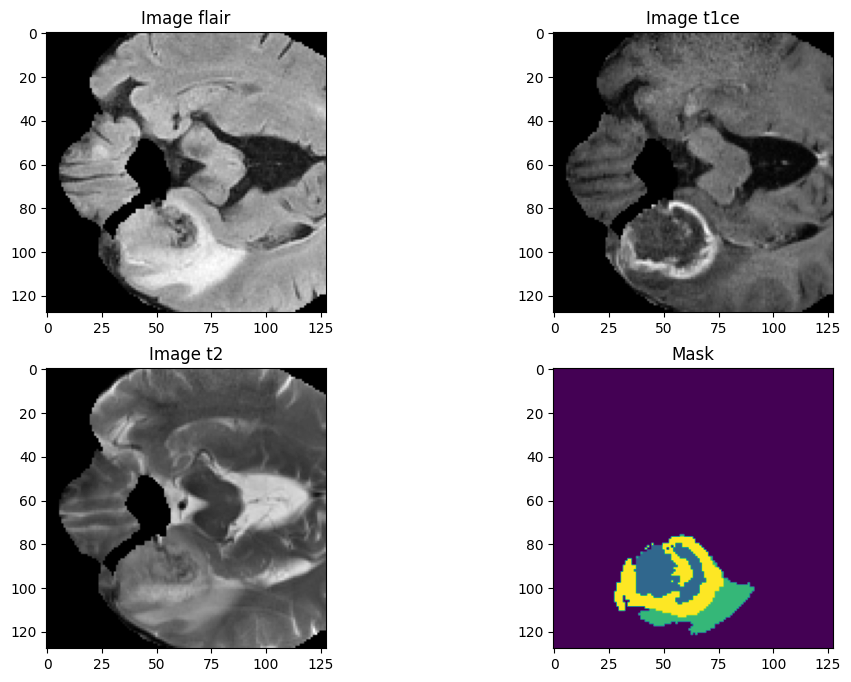

In [4]:
import os
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
import glob
import random

train_img_dir = "/kaggle/input/data-train/train/images/"
train_mask_dir = "/kaggle/input/data-train/train/masks/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)
img_list.sort()
msk_list.sort()
num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir+img_list[img_num])
test_mask = np.load(train_mask_dir+msk_list[img_num])
test_mask = np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
import glob
import numpy as np
import pandas as pd

columns = ['0', '1', '2', '3']
df = pd.DataFrame(columns=columns)

train_mask_list = sorted(glob.glob('BraTS2020_TrainingData/input_data_128/train/masks/*.npy'))

for img in range(len(train_mask_list)):
    print(f"Processing mask {img}")
    temp_image = np.load(train_mask_list[img])
    temp_image = np.argmax(temp_image, axis=3)  
    val, counts = np.unique(temp_image, return_counts=True)

    counts_dict = {key: 0 for key in columns}
    for v, c in zip(val, counts):
        counts_dict[str(v)] = c
    
    temp_df = pd.DataFrame([counts_dict], columns=columns)

    df = pd.concat([df, temp_df], ignore_index=True)  
label_0 = df['0'].sum()
label_1 = df['1'].sum()
label_2 = df['2'].sum()  
label_3 = df['3'].sum()

total_labels = label_0 + label_1 + label_2 + label_3

n_classes = 4

def safe_division(total, label_count, n_classes):
    if label_count == 0:
        return float('inf')  
    return round(total / (n_classes * label_count), 2)

class_weights = {
    'wt0': safe_division(total_labels, label_0, n_classes),
    'wt1': safe_division(total_labels, label_1, n_classes),
    'wt2': safe_division(total_labels, label_2, n_classes),
    'wt3': safe_division(total_labels, label_3, n_classes),
}

print("Class weights:", class_weights)


In [5]:

train_img_dir = "/kaggle/input/data-train/train/images/"
train_mask_dir = "/kaggle/input/data-train/train/masks/"

val_img_dir = "/kaggle/input/val-val-v/val/images/"
val_mask_dir = "/kaggle/input/val-val-v/val/masks/"

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)


train_img_list.sort()
train_mask_list.sort()

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

val_img_list.sort()
val_mask_list.sort()

In [14]:
batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

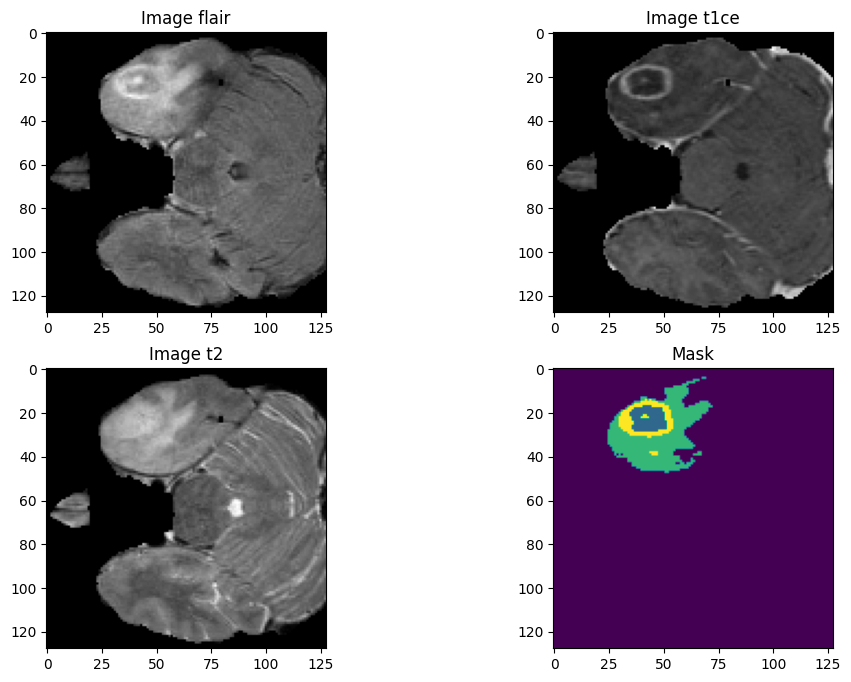

In [7]:
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()


In [ ]:
%pip install scikit-image

In [ ]:
%pip install segmentation-models-3D==1.0.5

In [8]:
import segmentation_models_3D as sm

#wt0 = class_weights["wt0"]
#wt1 = class_weights["wt1"]
#wt2 = class_weights["wt2"]
#wt3 = class_weights["wt3"]

wt0= 0.26
wt1 = 22.92
wt2 = 9.02
wt3 = 26.65

dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR)

Segmentation Models: using `tf.keras` framework.


In [15]:
steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size


In [16]:
model = simple_unet_model(IMG_HEIGHT=128, 
                          IMG_WIDTH=128, 
                          IMG_DEPTH=128, 
                          IMG_CHANNELS=3, 
                          num_classes=4)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d_38 (Conv3D)             (None, 128, 128, 12  1312        ['input_3[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout_18 (Dropout)           (None, 128, 128, 12  0           ['conv3d_38[0][0]']              
                                8, 16)                                                      

In [17]:
model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

print(model.input_shape)
print(model.output_shape)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d_38 (Conv3D)             (None, 128, 128, 12  1312        ['input_3[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout_18 (Dropout)           (None, 128, 128, 12  0           ['conv3d_38[0][0]']              
                                8, 16)                                                      

In [18]:
history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=3,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

Epoch 1/3
129/129 [==============================] - 10564s 82s/step - loss: 0.5442 - accuracy: 0.5072 - iou_score: 0.1213 - val_loss: -0.2795 - val_accuracy: 0.9398 - val_iou_score: 0.2754
Epoch 2/3
129/129 [==============================] - 10376s 80s/step - loss: -2.1278 - accuracy: 0.9091 - iou_score: 0.3394 - val_loss: -3.0507 - val_accuracy: 0.9252 - val_iou_score: 0.3640
Epoch 3/3
129/129 [==============================] - 9941s 77s/step - loss: -2.1255 - accuracy: 0.8387 - iou_score: 0.3216 - val_loss: -3.0871 - val_accuracy: 0.9327 - val_iou_score: 0.3691
